# Zomato Restaurant Project
# Problem Statement:
    Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
 Country code
 Country name
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range



# Uploading all Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [2]:
####reading the CSV file
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",encoding='ISO-8859-1')

In [3]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
datacode=pd.read_excel(r'C:\Users\apkar\Downloads\Country-Code.xlsx')

In [5]:
datacode.head(10)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
df = pd.merge(data, datacode, how='inner', on ='Country Code')

In [7]:
df.sample(25)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
2094,18205653,Freshnfit.in,1,Gurgaon,"Sector 52, Near South City 2, Gurgaon",South City 2,"South City 2, Gurgaon",77.086061,28.436253,Juices,...,No,No,No,No,1,0.0,White,Not rated,1,India
7491,2726,1911 Bar - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218185,28.625443,"Finger Food, European",...,Yes,No,No,No,4,3.2,Orange,Average,10,India
3487,312173,Zaaika Junction,1,New Delhi,"Shop 43/6, Ground Floor, Community Center, Eas...",East of Kailash,"East of Kailash, New Delhi",77.245817,28.558549,"Chinese, Mughlai, North Indian",...,No,Yes,No,No,2,3.1,Orange,Average,25,India
1492,18161583,Wangchuk's Ladakhi Kitchen,1,Gurgaon,"2nd Floor, Jalsa Building, Opposite Arjun Marg...",Golf Course Road,"Golf Course Road, Gurgaon",77.094083,28.466322,"Tibetan, Nepalese",...,No,Yes,No,No,2,3.6,Yellow,Good,241,India
2909,306015,Standard Sweets,1,New Delhi,"3510, Chawri Bazar, New Delhi",Chawri Bazar,"Chawri Bazar, New Delhi",77.227358,28.649449,"Mithai, North Indian",...,No,No,No,No,1,3.6,Yellow,Good,31,India
3223,302655,Arabian Delites,1,New Delhi,"23, Flyover Market, Defence Colony, New Delhi",Defence Colony,"Defence Colony, New Delhi",77.238122,28.577648,"Lebanese, Arabian",...,No,Yes,No,No,2,3.6,Yellow,Good,146,India
4284,619,Cafe Coffee Day - The Lounge,1,New Delhi,"Peary Lal and Sons, 42, Janpath, New Delhi",Janpath,"Janpath, New Delhi",77.220289,28.626429,Cafe,...,No,No,No,No,2,3.3,Orange,Average,81,India
199,17330311,Meritage,216,Columbus,"1039 1st Ave, Columbus, GA 31901",Columbus,"Columbus, Columbus",-84.992093,32.466158,"American, Tapas",...,No,No,No,No,3,4.1,Green,Very Good,302,United States
3251,18472678,Garam Masala,1,New Delhi,"1002, Gurudwara Road, Kotla Mubarakpur, Defenc...",Defence Colony,"Defence Colony, New Delhi",77.225420,28.572861,North Indian,...,No,No,No,No,1,0.0,White,Not rated,0,India
7492,301523,Nostalgia at 1911 Brasserie - The Imperial,1,New Delhi,"The Imperial, Janpath, New Delhi","The Imperial, Janpath","The Imperial, Janpath, New Delhi",77.218187,28.625445,"European, Continental",...,Yes,No,No,No,4,3.2,Orange,Average,12,India


In [8]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [9]:
df.shape

(9551, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [12]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [13]:
df.drop(['Restaurant ID'],axis=1,inplace=True)

In [14]:
df.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [15]:
df.drop(['Switch to order menu'],axis=1,inplace=True)  ##we drop switch to order menu as it has one value

In [16]:
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# EDA

Comparing feature coloumn with Target Coloumn

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '1'),
  Text(1, 0, '14'),
  Text(2, 0, '30'),
  Text(3, 0, '37'),
  Text(4, 0, '94'),
  Text(5, 0, '148'),
  Text(6, 0, '162'),
  Text(7, 0, '166'),
  Text(8, 0, '184'),
  Text(9, 0, '189'),
  Text(10, 0, '191'),
  Text(11, 0, '208'),
  Text(12, 0, '214'),
  Text(13, 0, '215'),
  Text(14, 0, '216')])

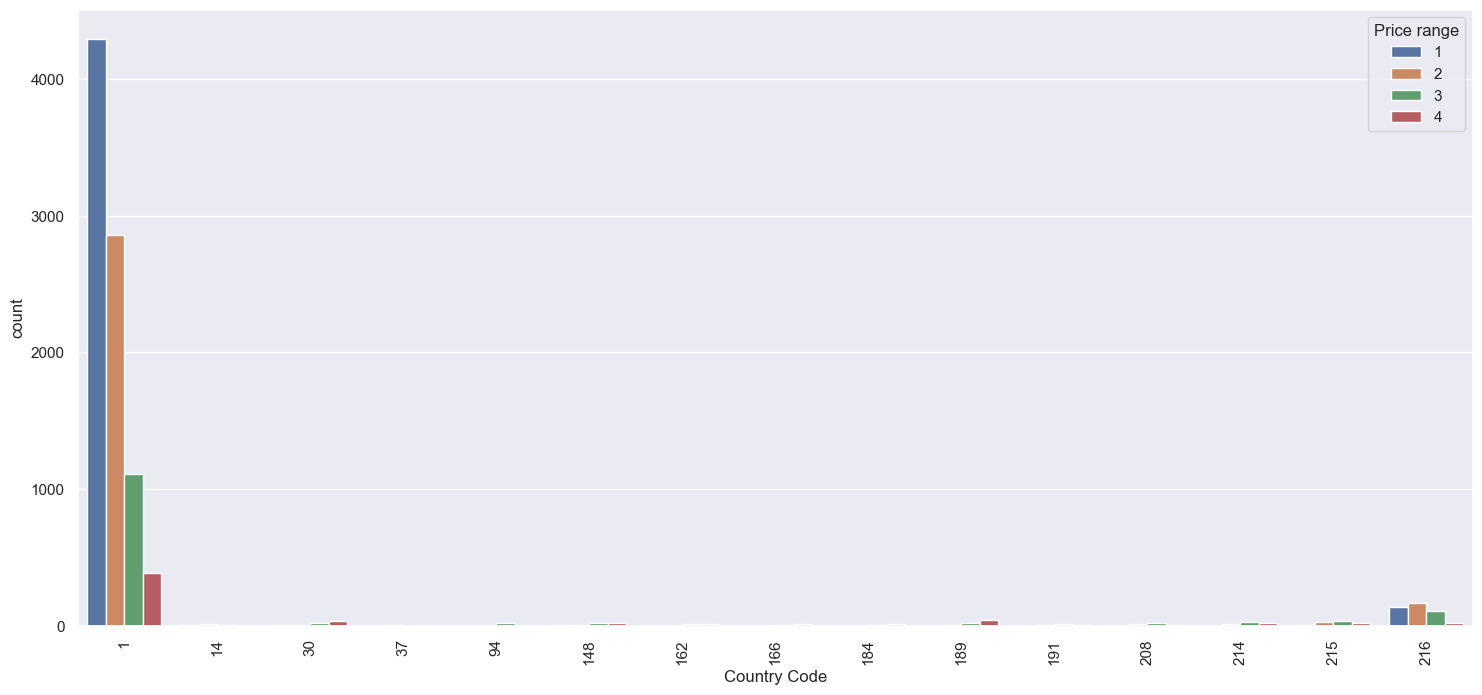

In [17]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['Country Code'],hue=df['Price range'])
plt.xticks(rotation=90)

Price range is maximum for the country code 1 in this plot

<AxesSubplot:xlabel='Country Code', ylabel='count'>

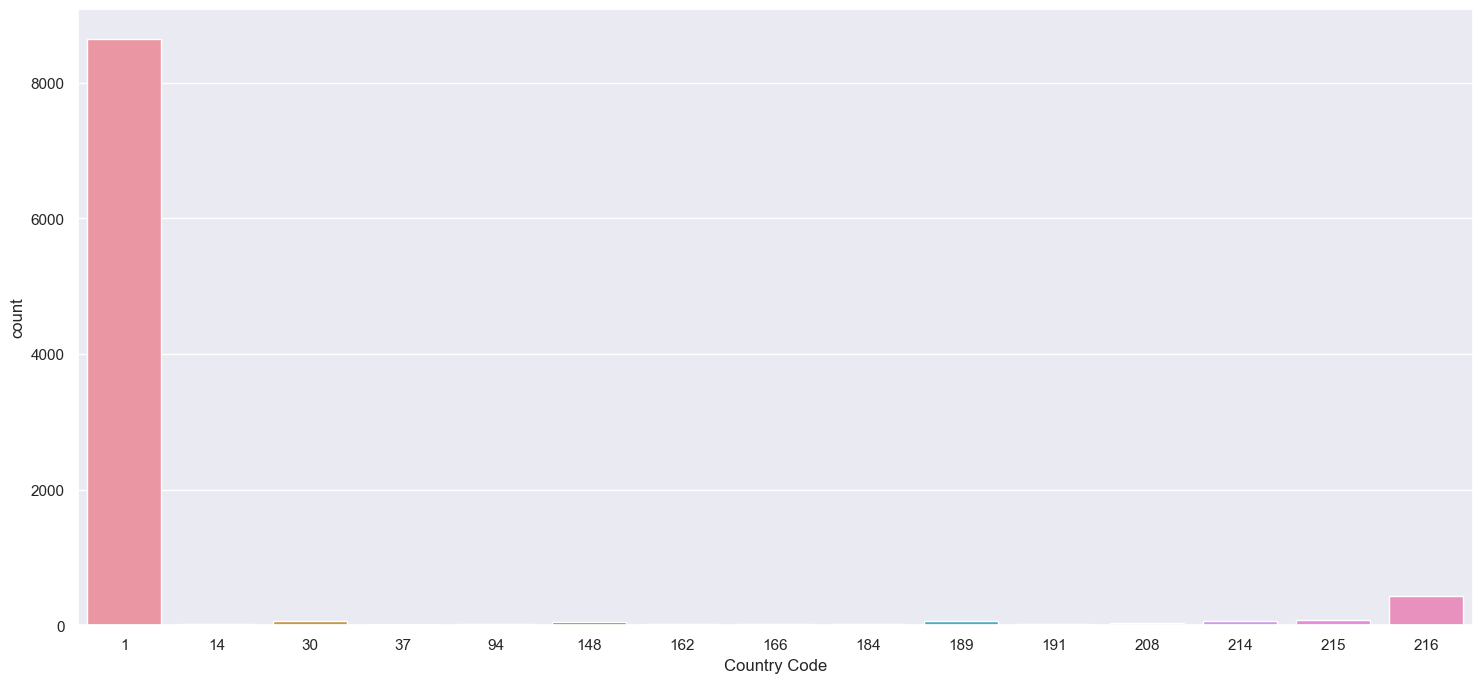

In [18]:
sns.countplot(df['Country Code'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Botswana Pula(P)'),
  Text(1, 0, 'Brazilian Real(R$)'),
  Text(2, 0, 'Dollar($)'),
  Text(3, 0, 'Emirati Diram(AED)'),
  Text(4, 0, 'Indian Rupees(Rs.)'),
  Text(5, 0, 'Indonesian Rupiah(IDR)'),
  Text(6, 0, 'NewZealand($)'),
  Text(7, 0, 'Pounds(\x8c£)'),
  Text(8, 0, 'Qatari Rial(QR)'),
  Text(9, 0, 'Rand(R)'),
  Text(10, 0, 'Sri Lankan Rupee(LKR)'),
  Text(11, 0, 'Turkish Lira(TL)')])

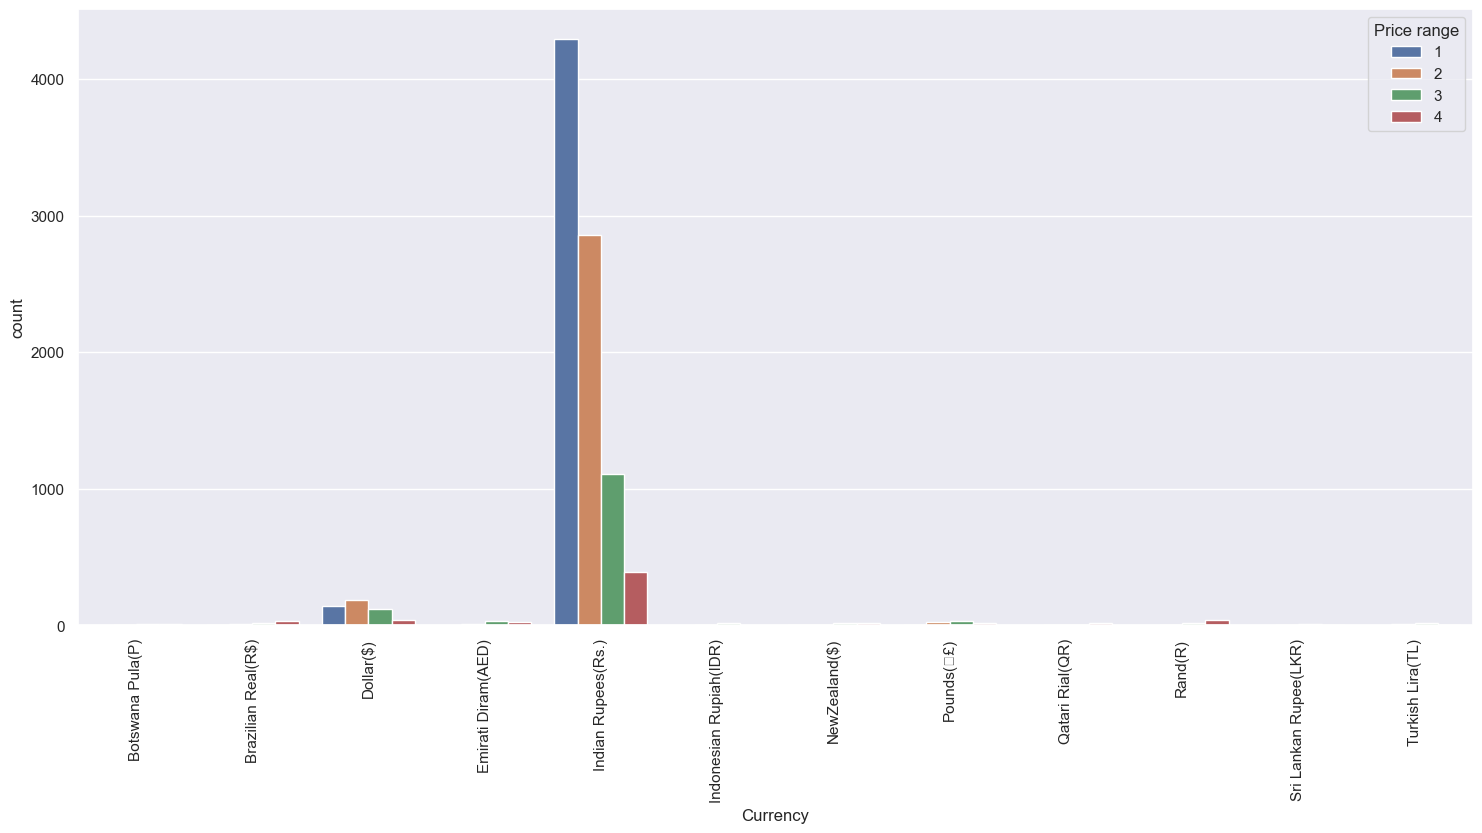

In [19]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['Currency'],hue=df['Price range'])
plt.xticks(rotation=90)

currencies with Indian Rupees have maximum Price range

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

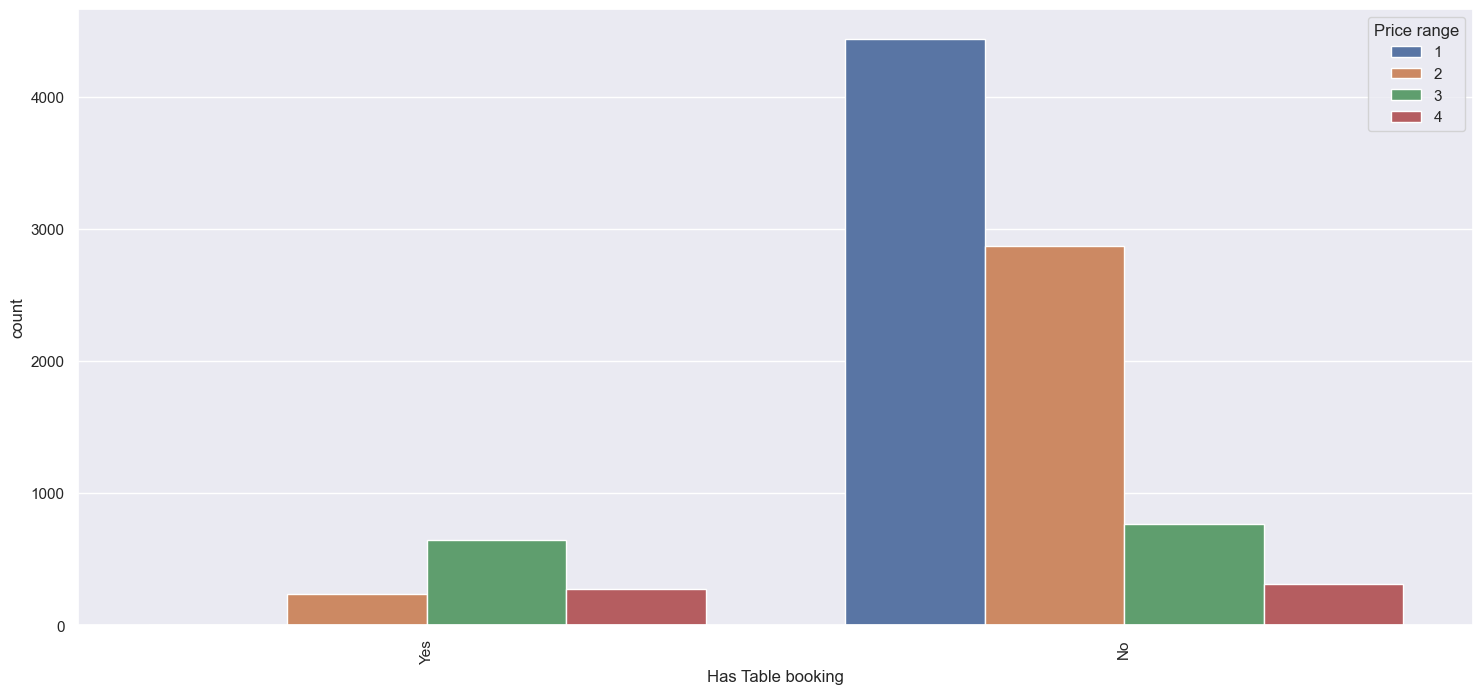

In [20]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['Has Table booking'],hue=df['Price range'])
plt.xticks(rotation=90)

Here we can see the price range is more for the no table booking

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

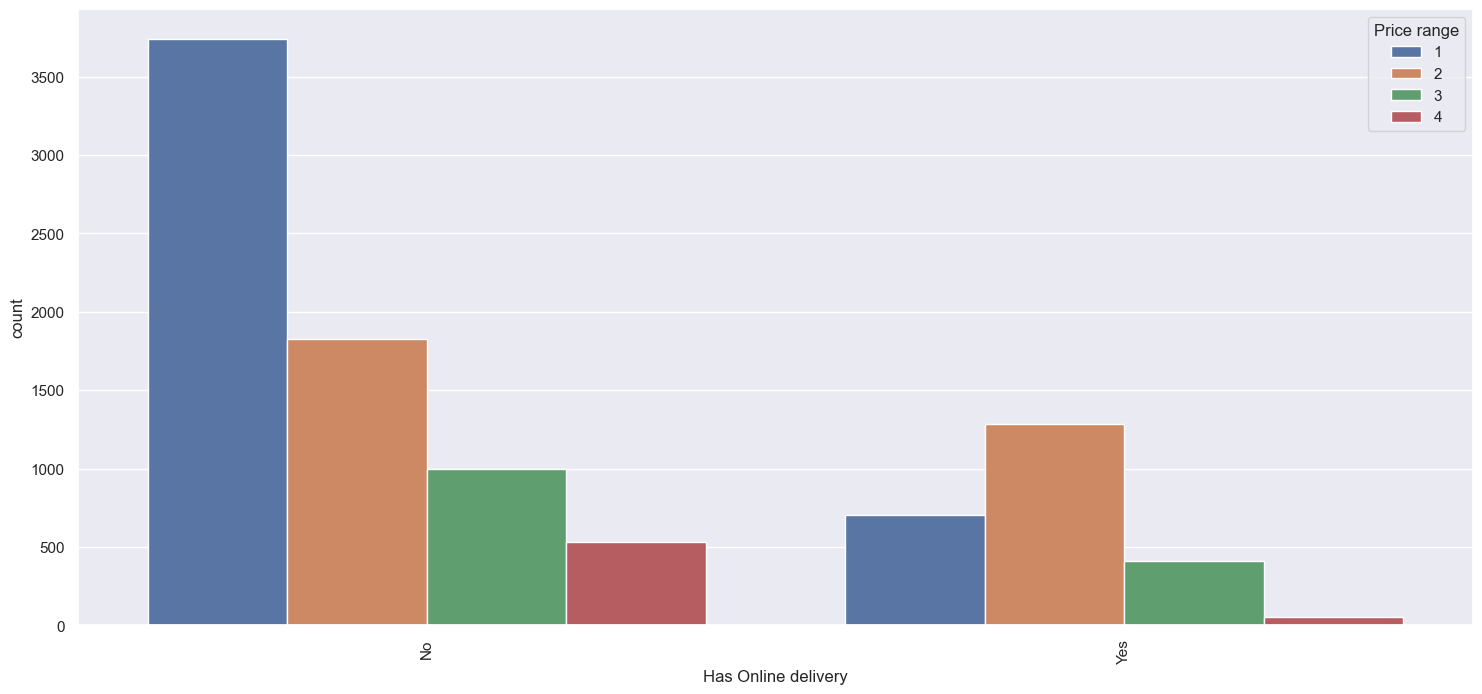

In [21]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['Has Online delivery'],hue=df['Price range'])
plt.xticks(rotation=90)

The Price range is more for the restaurant with no online delivery

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

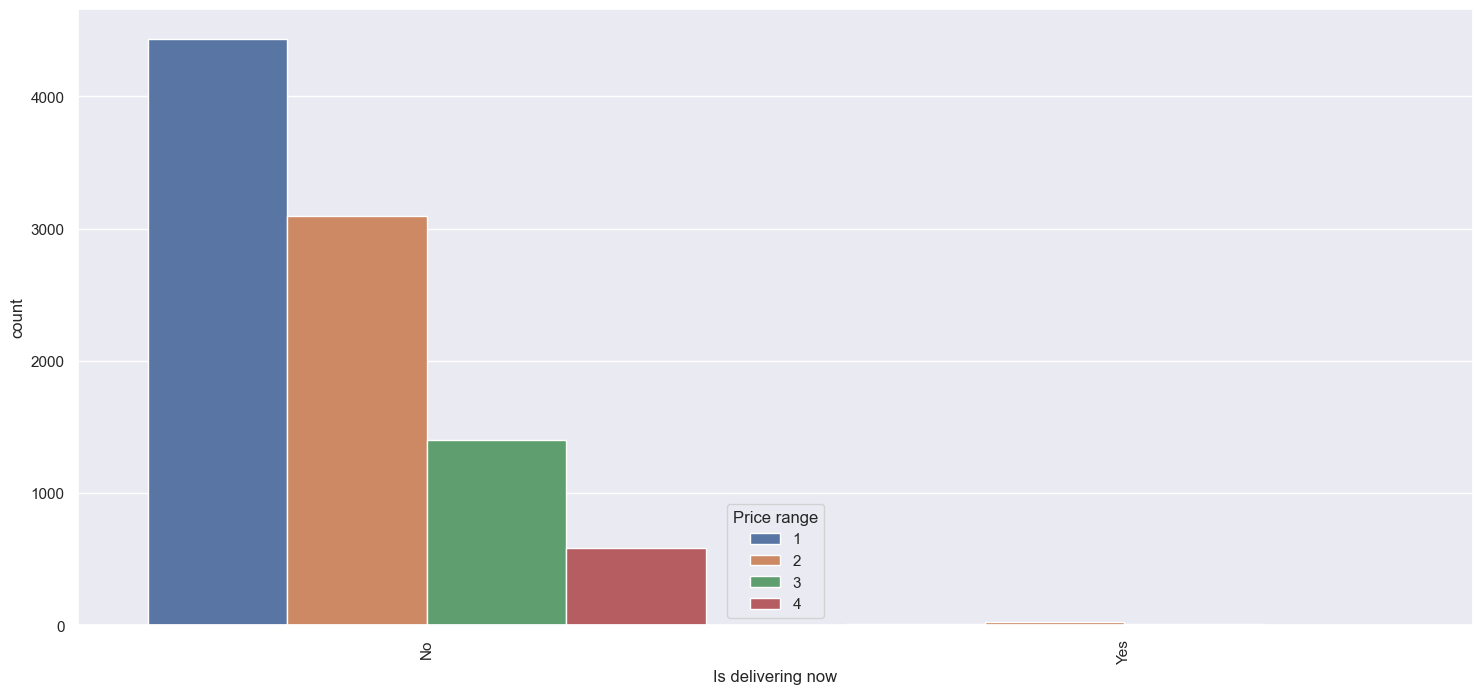

In [22]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['Is delivering now'],hue=df['Price range'])
plt.xticks(rotation=90)

The Price range is more for the no delivering now option

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Dark Green'),
  Text(1, 0, 'Green'),
  Text(2, 0, 'Yellow'),
  Text(3, 0, 'Orange'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Red')])

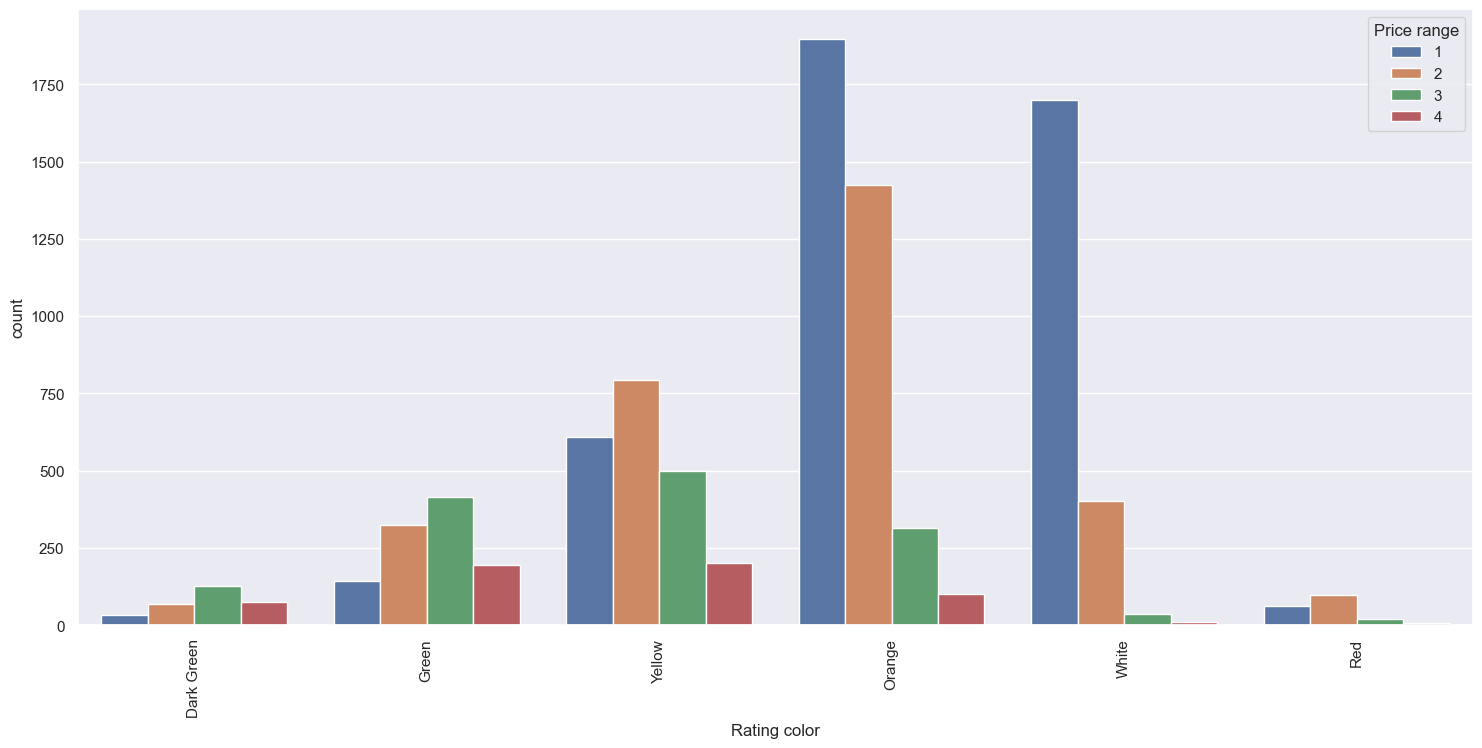

In [23]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['Rating color'],hue=df['Price range'])
plt.xticks(rotation=90)


restaurant with high rating have higher price

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Dark Green'),
  Text(1, 0, 'Green'),
  Text(2, 0, 'Yellow'),
  Text(3, 0, 'Orange'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Red')])

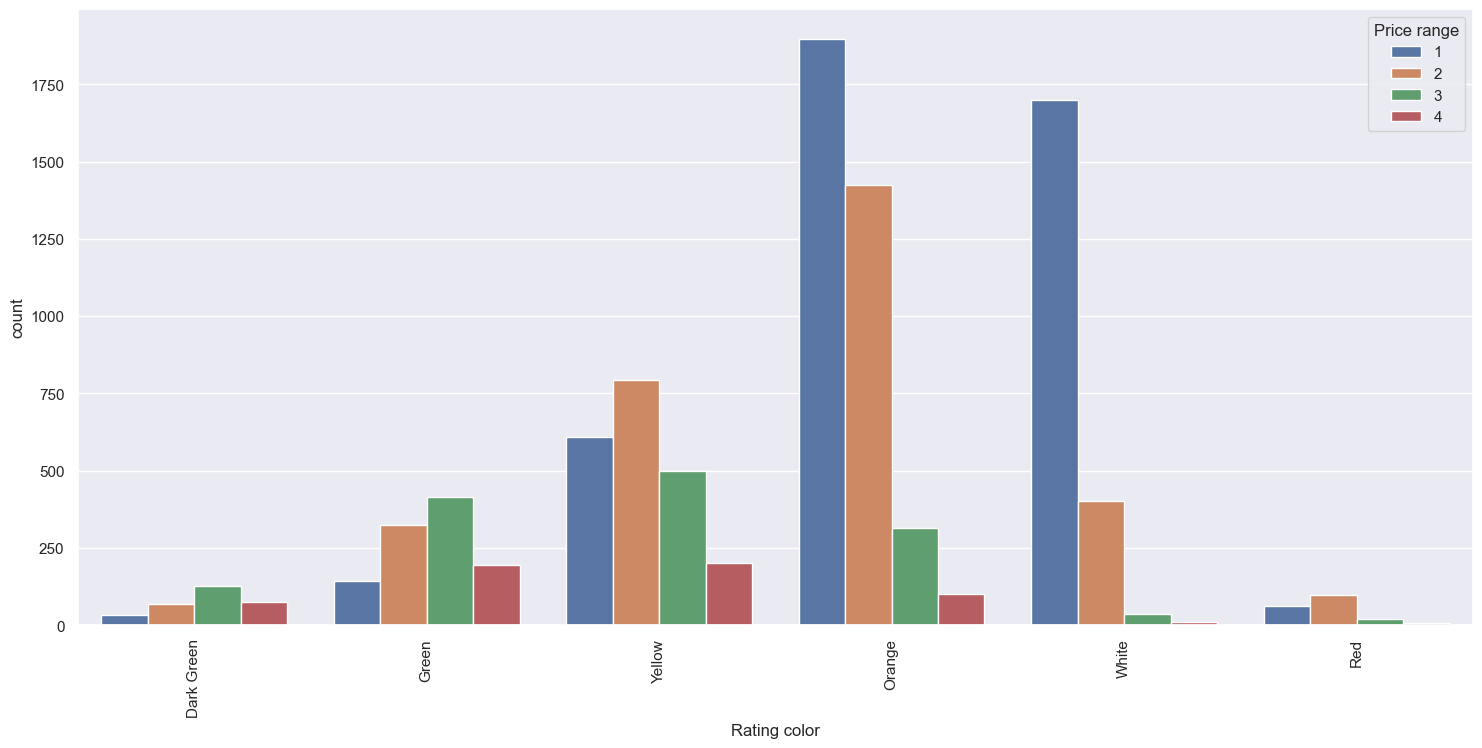

In [24]:
sns.set(rc={"figure.figsize":(18,8)})
sns.countplot(df['Rating color'],hue=df['Price range'])
plt.xticks(rotation=90)


# Label Encoder

In [25]:
le=LabelEncoder()
lobject1=['Restaurant Name','City','Address','Locality','Locality Verbose','Cuisines','Currency','Has Table booking','Has Online delivery','Is delivering now','Rating color','Rating text','Country']
for i in lobject1:
    df[i]=le.fit_transform(df[i])

In [26]:
df.dtypes

Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

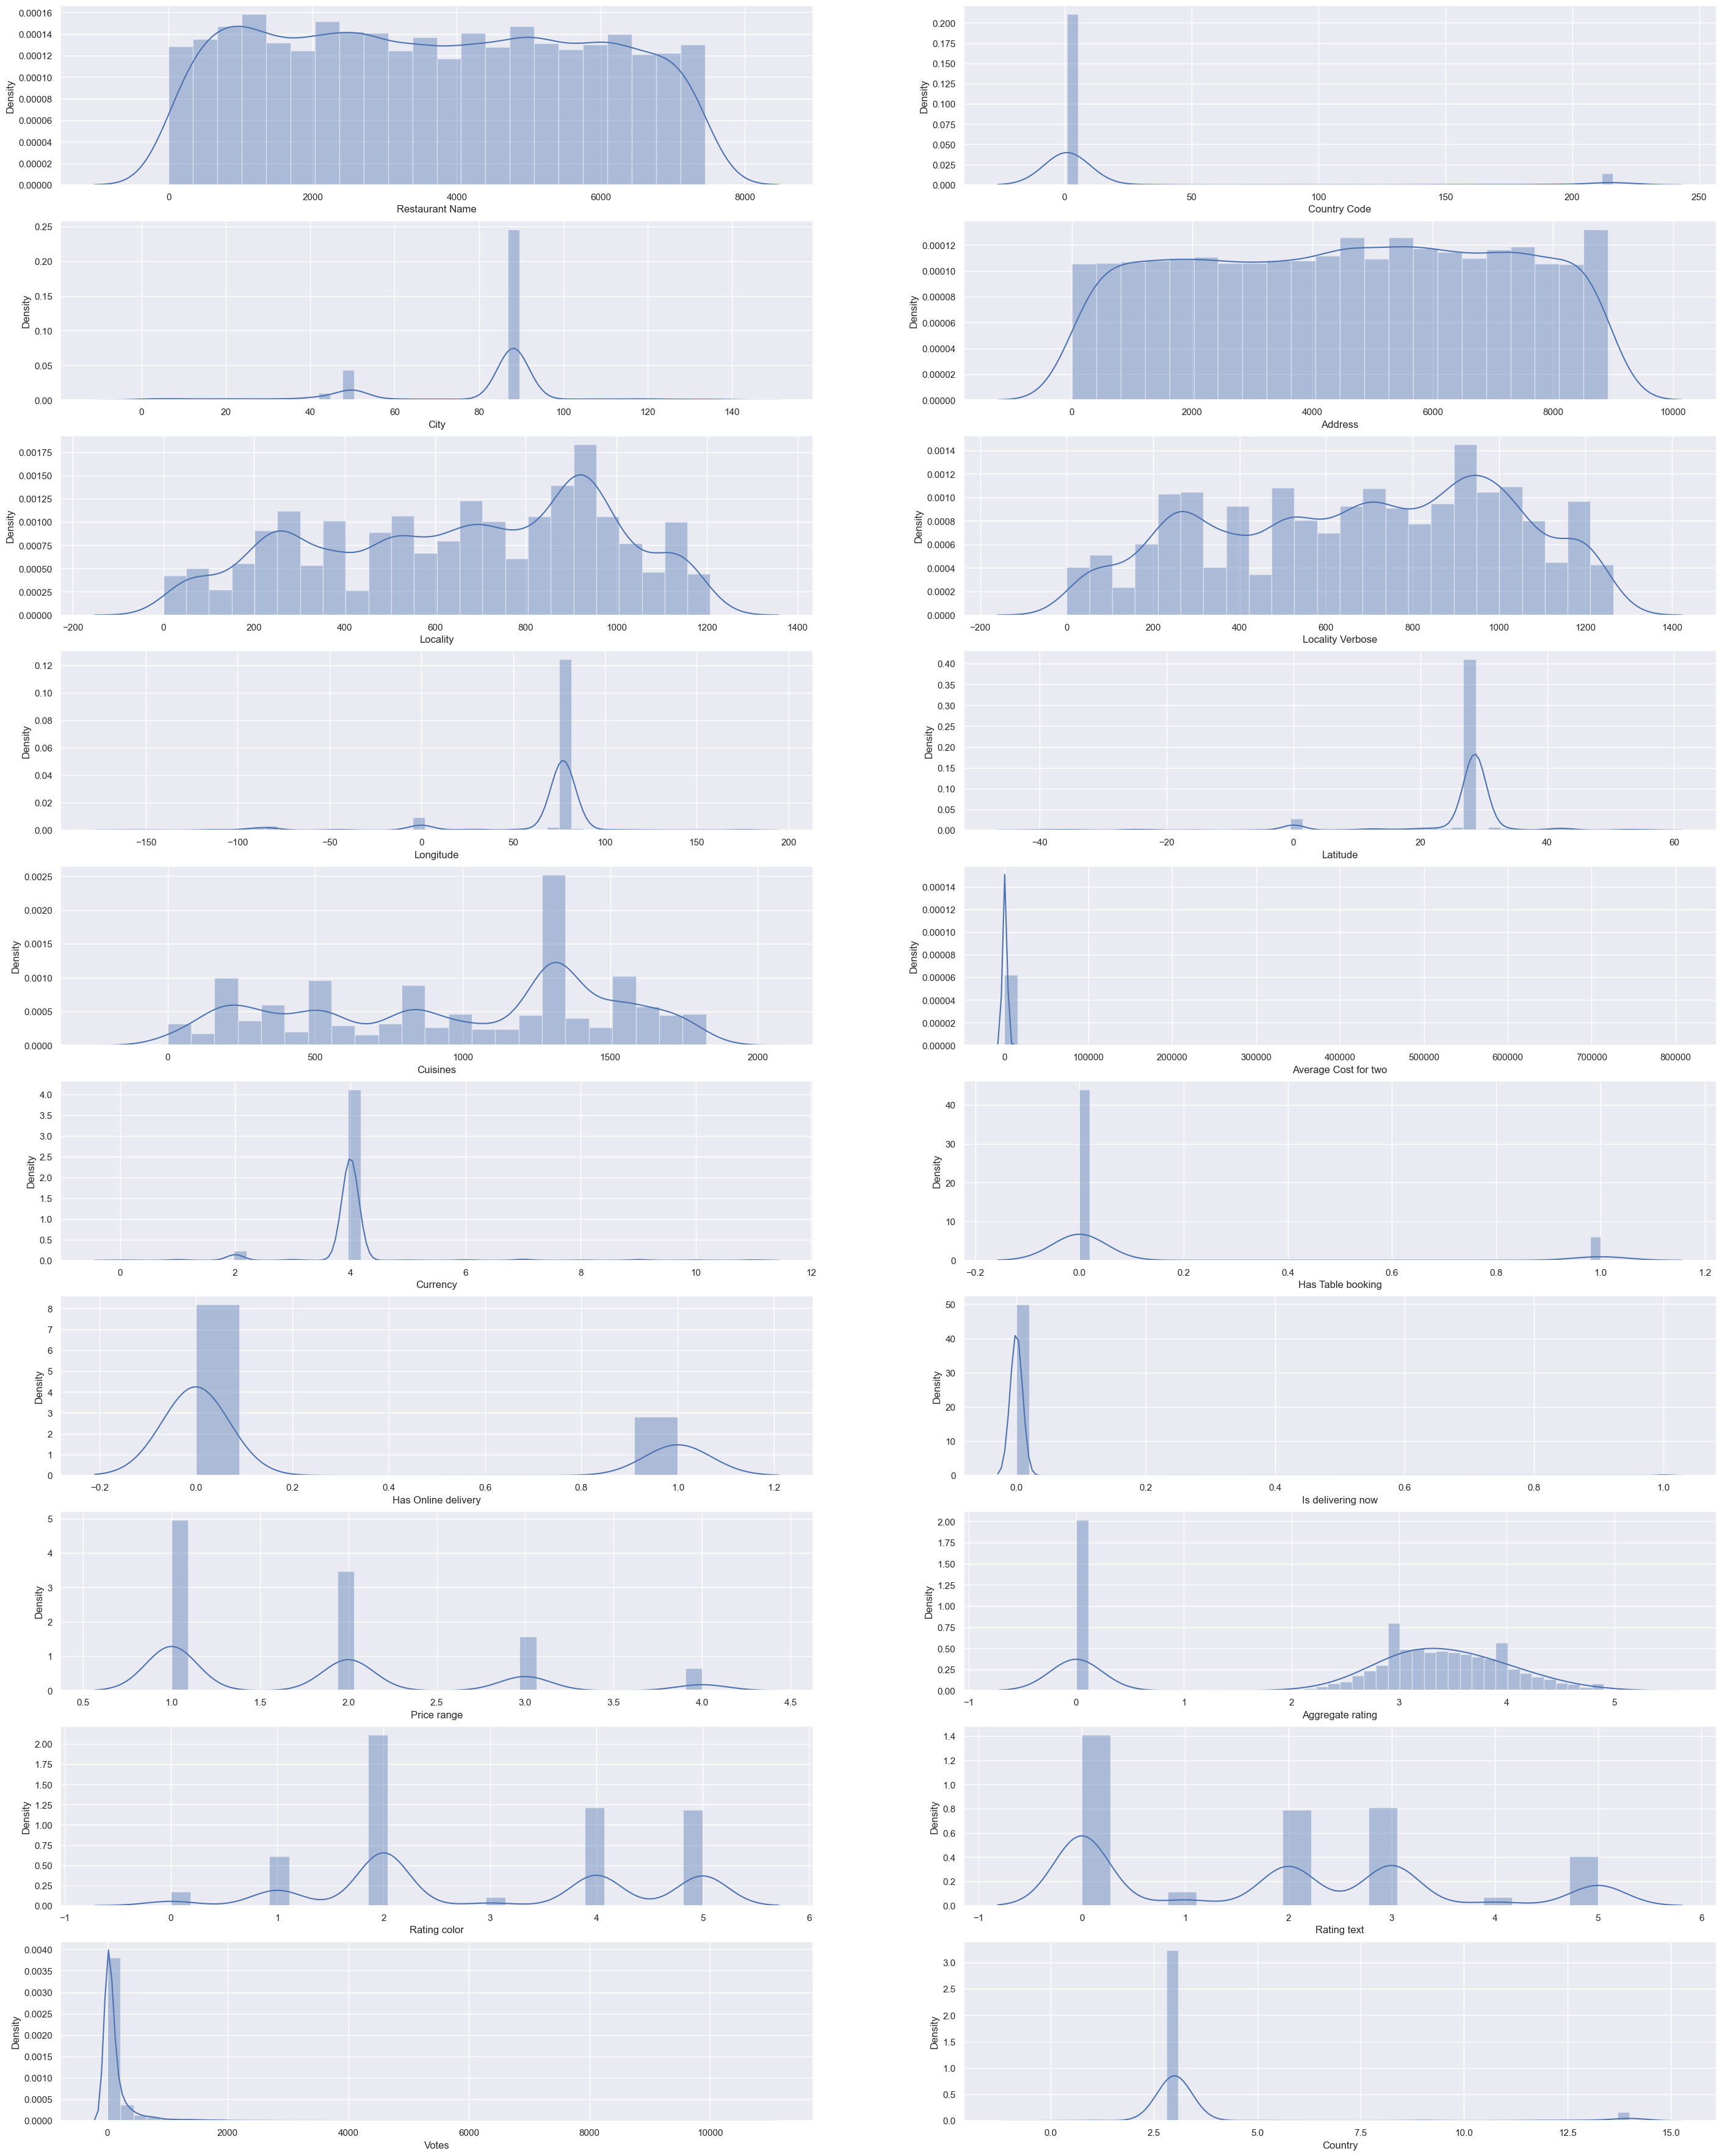

In [27]:
plt.figure(figsize=(35,45))
count =1
for column in df:
    if count <= 20:
        ax = plt.subplot(10,2,count)
        sns.distplot(df[column])
        plt.xlabel(column) 
    count+=1
plt.show()

From the distribution plot,we can see skewness is present

# Statistical Analysis

In [28]:
df.describe()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.00000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,3653.204586,18.365616,78.301434,4542.439430,658.128468,677.304994,64.126574,25.854381,989.95079,1199.210763,3.977699,0.121244,0.256622,0.003560,1.804837,2.666370,2.952885,1.788713,156.909748,3.736781
std,2142.917876,56.750546,23.198915,2565.717005,315.866515,331.727449,41.467058,11.007935,514.72354,16121.183073,0.914242,0.326428,0.436792,0.059561,0.905609,1.516378,1.493048,1.694637,430.169145,2.651963
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1777.500000,1.000000,76.000000,2323.500000,381.000000,387.000000,77.081343,28.478713,497.00000,250.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,3595.000000,1.000000,88.000000,4610.000000,696.000000,707.000000,77.191964,28.570469,1127.00000,400.000000,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,5485.500000,1.000000,88.000000,6746.500000,921.000000,953.000000,77.282006,28.642758,1355.00000,700.000000,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,131.000000,3.000000
max,7445.000000,216.000000,140.000000,8917.000000,1207.000000,1264.000000,174.832089,55.976980,1825.00000,800000.000000,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


# Heatmap

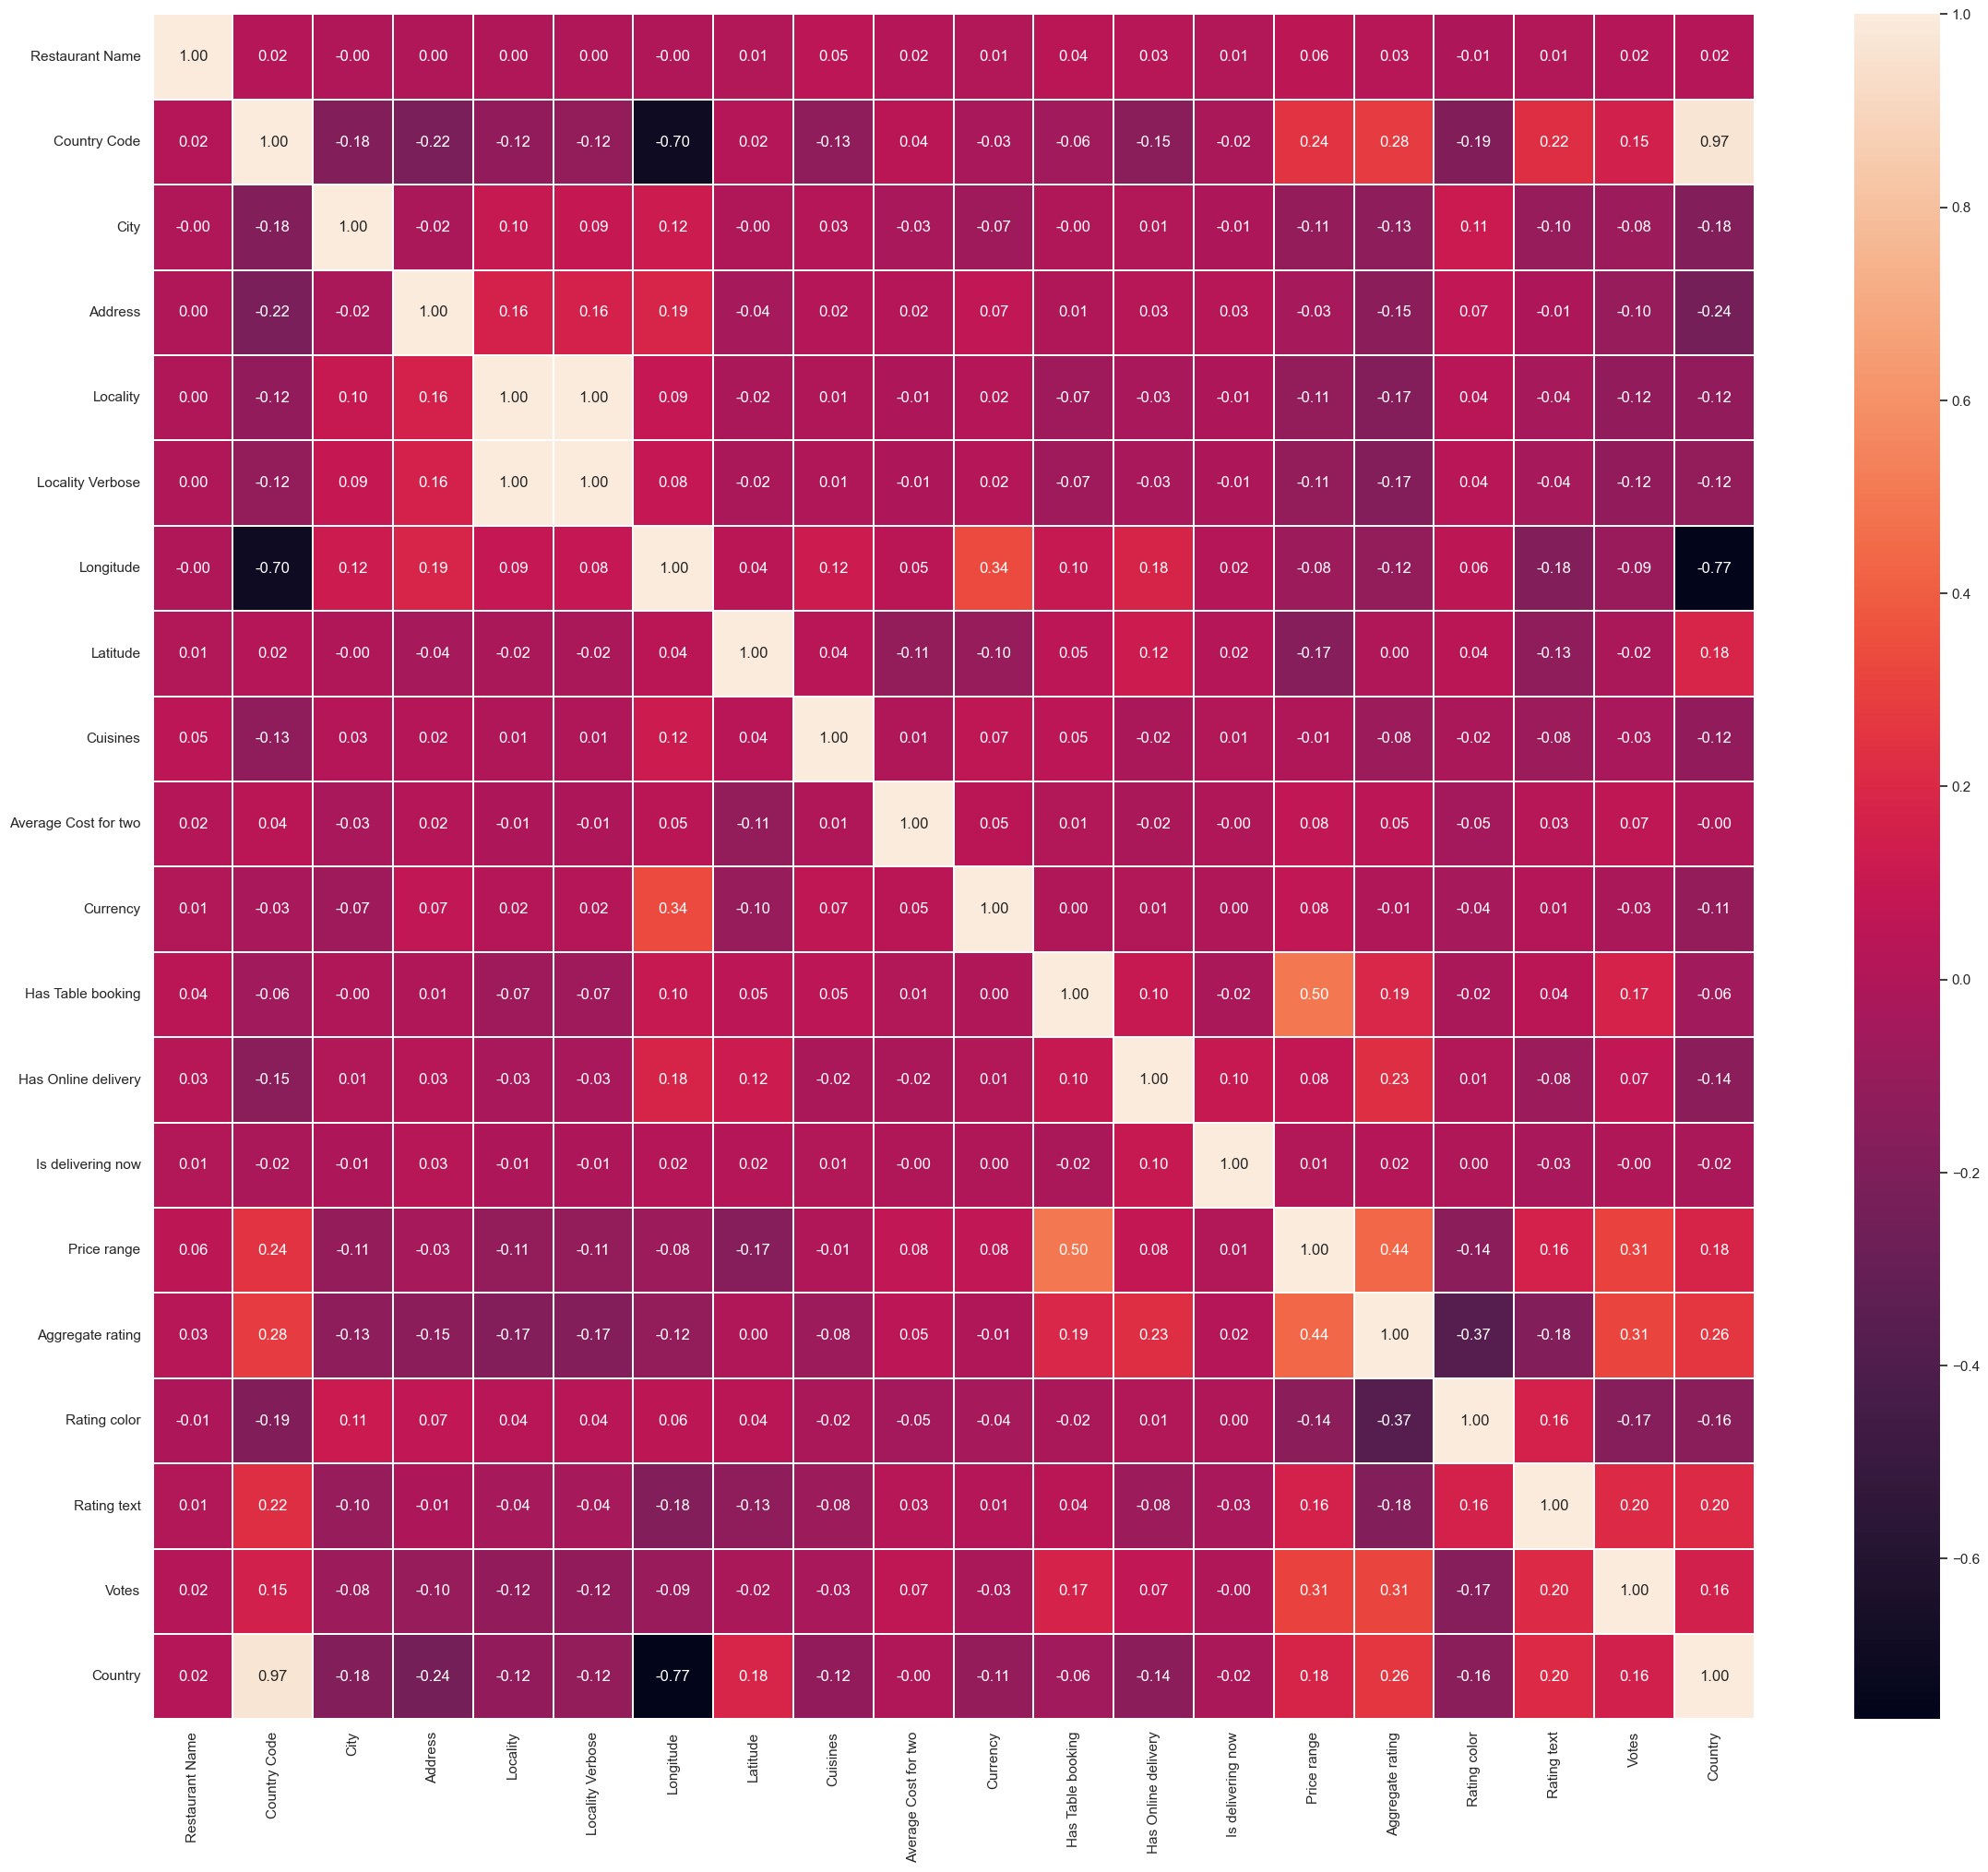

In [29]:
plt.figure(figsize=(28,24))
sns.heatmap(df.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()

In [30]:
df.corr()["Price range"].sort_values()

Latitude               -0.166688
Rating color           -0.140468
Locality               -0.114459
Locality Verbose       -0.112313
City                   -0.105759
Longitude              -0.078939
Address                -0.034952
Cuisines               -0.005489
Is delivering now       0.010940
Restaurant Name         0.061275
Average Cost for two    0.075083
Currency                0.075179
Has Online delivery     0.077918
Rating text             0.164242
Country                 0.178035
Country Code            0.243327
Votes                   0.309444
Aggregate rating        0.437944
Has Table booking       0.501925
Price range             1.000000
Name: Price range, dtype: float64

In [31]:
df.drop(["Locality Verbose"],axis=1,inplace=True)

we drop Locality Verbose as it produce multicollinearity

# Removing outliers using Z-score method

In [32]:
from scipy.stats import zscore
z=np.abs(zscore(df))
np.where(z>3)

dfnew=df[(z<3).all(axis=1)]
dfnew.shape

(8408, 19)


% loss of data=(9551-8408)/9551*100=11%

In [33]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

# Balancing the data

In [34]:
smt=SMOTE()
x=dfnew.drop(["Price range"],axis=1)
y=dfnew["Price range"]
trainx,trainy=smt.fit_resample(x,y)
trainx.shape

(17076, 18)

In [35]:
trainx.skew().sort_values()

Currency               -10.019382
Longitude               -3.963252
Latitude                -3.047983
Aggregate rating        -1.465996
City                    -1.036949
Cuisines                -0.387519
Locality                -0.149945
Address                 -0.141320
Restaurant Name         -0.012538
Is delivering now        0.000000
Rating color             0.138989
Rating text              0.499671
Has Table booking        1.153360
Has Online delivery      1.596874
Average Cost for two     1.800459
Votes                    2.559305
Country Code            11.134772
Country                 11.623713
dtype: float64

In [36]:
list=['Currency','Country Code','Country']
for i in list:
    if trainx.skew().loc[i]>0.5:
        trainx[i]=np.log1p(trainx[i])
trainx.skew().sort_values()


Currency               -10.019382
Longitude               -3.963252
Latitude                -3.047983
Aggregate rating        -1.465996
City                    -1.036949
Cuisines                -0.387519
Locality                -0.149945
Address                 -0.141320
Restaurant Name         -0.012538
Is delivering now        0.000000
Rating color             0.138989
Rating text              0.499671
Has Table booking        1.153360
Has Online delivery      1.596874
Average Cost for two     1.800459
Votes                    2.559305
Country Code             9.939841
Country                 11.237371
dtype: float64

# Standard Scaler

In [37]:
sc=StandardScaler()
dfx=sc.fit_transform(trainx)
dfx.mean()

-8.802955212561039e-17

# Model Building

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,trainy,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((accuracy_score(y_test,pred_test))>maxacc):
            maxacc=accuracy_score(y_test,pred_test)
            rs=i
        print(f"at random state {i},  accuracy score is {accuracy_score(y_test,pred_test)}")
        print(f"at random state {i}, confusion matrix is {confusion_matrix(y_test,pred_test)}")
        print(f"at random state {i}, classification report is {classification_report(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

# DecisionTreeClassifier

In [39]:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model_selection(dtc)
        


at random state 0,  accuracy score is 0.9849697442904548
at random state 0, confusion matrix is [[1276    5    0    0]
 [   2 1241   12    0]
 [   0   16 1270   19]
 [   0    0   23 1259]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1281
           2       0.98      0.99      0.99      1255
           3       0.97      0.97      0.97      1305
           4       0.99      0.98      0.98      1282

    accuracy                           0.98      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.98      0.98      0.98      5123



at random state 1,  accuracy score is 0.9847745461643568
at random state 1, confusion matrix is [[1298    2    0    0]
 [   3 1225   19    0]
 [   0   12 1269   19]
 [   0    0   23 1253]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.0

In [40]:
score=cross_val_score(dtc,dfx,trainy,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.90204918 0.98114754 0.98729508 0.98892989 0.98113981 0.98277983
 0.74743747]
0.9386826865926737
0.08311362318200298


# RandomForestClassifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

at random state 0,  accuracy score is 0.9912160843255905
at random state 0, confusion matrix is [[1276    5    0    0]
 [   4 1243    8    0]
 [   0   18 1285    2]
 [   0    0    8 1274]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1281
           2       0.98      0.99      0.99      1255
           3       0.99      0.98      0.99      1305
           4       1.00      0.99      1.00      1282

    accuracy                           0.99      5123
   macro avg       0.99      0.99      0.99      5123
weighted avg       0.99      0.99      0.99      5123



at random state 1,  accuracy score is 0.9927776693343744
at random state 1, confusion matrix is [[1295    5    0    0]
 [   2 1238    7    0]
 [   0    9 1287    4]
 [   0    0   10 1266]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      1.00      1.0

In [42]:
score=cross_val_score(rf,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.93940281 0.99004392 0.99648609 0.98535871 0.98828697]
0.97991570115313
0.020582310484704606


# LogisticRegression

In [43]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

at random state 0,  accuracy score is 0.9519812609798946
at random state 0, confusion matrix is [[1249   32    0    0]
 [   9 1215   31    0]
 [   0   40 1202   63]
 [   0    0   71 1211]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1281
           2       0.94      0.97      0.96      1255
           3       0.92      0.92      0.92      1305
           4       0.95      0.94      0.95      1282

    accuracy                           0.95      5123
   macro avg       0.95      0.95      0.95      5123
weighted avg       0.95      0.95      0.95      5123



at random state 1,  accuracy score is 0.9568612141323444
at random state 1, confusion matrix is [[1274   26    0    0]
 [   4 1208   35    0]
 [   0   30 1201   69]
 [   0    0   57 1219]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       1.00      0.98      0.9

In [44]:
score=cross_val_score(lg,dfx,trainy,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.91071429 0.94612006 0.96778917 0.95783309 0.95373353]
0.9472380255176741
0.019555202418597643


# KnClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
model_selection(knn)

at random state 0,  accuracy score is 0.8003123170017568
at random state 0, confusion matrix is [[1063  202   15    1]
 [ 344  766  131   14]
 [  19  141 1049   96]
 [   2    3   55 1222]]
at random state 0, classification report is               precision    recall  f1-score   support

           1       0.74      0.83      0.78      1281
           2       0.69      0.61      0.65      1255
           3       0.84      0.80      0.82      1305
           4       0.92      0.95      0.93      1282

    accuracy                           0.80      5123
   macro avg       0.80      0.80      0.80      5123
weighted avg       0.80      0.80      0.80      5123



at random state 1,  accuracy score is 0.796017958227601
at random state 1, confusion matrix is [[1026  257   16    1]
 [ 335  782  114   16]
 [  24  139 1057   80]
 [   0    4   59 1213]]
at random state 1, classification report is               precision    recall  f1-score   support

           1       0.74      0.79      0.76

In [46]:
score=cross_val_score(knn,dfx,trainy,cv=9)
print(score)
print(score.mean())
print(score.std())

[0.70600632 0.71654373 0.76659642 0.73326305 0.77227201 0.7601476
 0.81391671 0.82445967 0.79493938]
0.7653494320582224
0.039069794278176806


# HyperParameter Tuning

In [47]:
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[12,15,17],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}

In [48]:
gdsv=GridSearchCV(estimator=rf,param_grid=dict,cv=5)

In [49]:
gdsv.fit(dfx,trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 15, 17],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [50]:
gdsv.best_params_


{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [51]:
gdsv.best_score_

0.9811450379061929

with the Random forest method we got accuracy 98%

# saving the Model

In [52]:
import pickle
filename="pricerange.pkl"
pickle.dump(rf,open(filename,'wb'))

# Predicting the average cost for two

Checking skewness of data

In [53]:
dfnew.skew().sort_values()

Currency               -18.026851
Longitude               -3.702347
Latitude                -3.241005
City                    -1.392152
Aggregate rating        -0.861415
Cuisines                -0.345840
Locality                -0.316614
Address                 -0.121484
Is delivering now        0.000000
Restaurant Name          0.045448
Rating color             0.101035
Rating text              0.422542
Has Online delivery      1.001452
Price range              1.054225
Has Table booking        2.269837
Average Cost for two     3.716607
Votes                    3.730394
Country Code            19.985320
Country                 20.254626
dtype: float64

In [54]:
trainx=dfnew.drop(['Average Cost for two'],axis=1)
y=dfnew["Average Cost for two"]

In [55]:
list=['Is delivering now','Country Code','Country','Votes','Has Table booking']
for i in list:
    if trainx.skew().loc[i]>0.5:
        trainx[i]=np.log1p(trainx[i])
        

In [56]:
trainx.skew()

Restaurant Name         0.045448
Country Code           19.941082
City                   -1.392152
Address                -0.121484
Locality               -0.316614
Longitude              -3.702347
Latitude               -3.241005
Cuisines               -0.345840
Currency              -18.026851
Has Table booking       2.269837
Has Online delivery     1.001452
Is delivering now       0.000000
Price range             1.054225
Aggregate rating       -0.861415
Rating color            0.101035
Rating text             0.422542
Votes                  -0.034100
Country                20.180374
dtype: float64

# Standard scaler

In [57]:
sc=StandardScaler()
dfx=sc.fit_transform(trainx)
dfx.mean()

4.706153123519428e-16

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.30)
        instance.fit(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred_test=instance.predict(x_test)
        if((r2_score(y_test,pred_test))>maxacc):
            maxacc=r2_score(y_test,pred_test)
            rs=i
        print(f"at random state {i}, testing accuracy is {r2_score(y_test,pred_test)}")
        print(f"at random state {i}, mean squared error is {mean_squared_error(y_test,pred_test)}")
        print(f"at random state {i}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)


In [59]:
trainx.shape

(8408, 18)

In [60]:
y.shape

(8408,)

# Model Building

# KN Regressor

In [61]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
model_selection(knr)

at random state 0, testing accuracy is 0.7267904783913194
at random state 0, mean squared error is 103874.24296472453
at random state 0, mean absolute error is 160.346016646849


at random state 1, testing accuracy is 0.7862945124341105
at random state 1, mean squared error is 67952.42370194213
at random state 1, mean absolute error is 146.3626634958383


at random state 2, testing accuracy is 0.7676059028641927
at random state 2, mean squared error is 77034.93380895759
at random state 2, mean absolute error is 152.13000396353547


at random state 3, testing accuracy is 0.8213332147158106
at random state 3, mean squared error is 50814.269916765756
at random state 3, mean absolute error is 138.61791518034087


at random state 4, testing accuracy is 0.7279303341936718
at random state 4, mean squared error is 93575.36107808165
at random state 4, mean absolute error is 156.84502576298058


at random state 5, testing accuracy is 0.7940539481302453
at random state 5, mean squared error is 78

# RandomforestRegressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model_selection(rfr)

at random state 0, testing accuracy is 0.8751073537491306
at random state 0, mean squared error is 47484.176264367816
at random state 0, mean absolute error is 111.91070154577883


at random state 1, testing accuracy is 0.8944772299582988
at random state 1, mean squared error is 33553.31705212049
at random state 1, mean absolute error is 104.2375941339675


at random state 2, testing accuracy is 0.8846562994602467
at random state 2, mean squared error is 38234.59565398336
at random state 2, mean absolute error is 107.19278636543798


at random state 3, testing accuracy is 0.9055349820386083
at random state 3, mean squared error is 26866.61044887039
at random state 3, mean absolute error is 99.15622275069363


at random state 4, testing accuracy is 0.8632016422367643
at random state 4, mean squared error is 47050.286494252876
at random state 4, mean absolute error is 110.84157748711853


at random state 5, testing accuracy is 0.8947928862743785
at random state 5, mean squared error is 4

In [63]:
score=cross_val_score(rfr,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77753052 0.84334157 0.85619532 0.84145943 0.86639664]
0.8369846953325546
0.031078423540066315


# Linear Regressor

In [64]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_selection(lm)

at random state 0, testing accuracy is -2.2898066608169523e+24
at random state 0, mean squared error is 8.70584348698583e+29
at random state 0, mean absolute error is 18575769025612.594


at random state 1, testing accuracy is 0.7225330644862143
at random state 1, mean squared error is 88226.79744945251
at random state 1, mean absolute error is 173.51849854763717


at random state 2, testing accuracy is 0.7478173709829643
at random state 2, mean squared error is 83594.51627010781
at random state 2, mean absolute error is 167.97978049755554


at random state 3, testing accuracy is 0.7640523221363132
at random state 3, mean squared error is 67105.41620888755
at random state 3, mean absolute error is 166.80196532384764


at random state 4, testing accuracy is 0.717743882372929
at random state 4, mean squared error is 97078.87884220104
at random state 4, mean absolute error is 169.43586311917053


at random state 5, testing accuracy is 0.7433513727018028
at random state 5, mean squared err

In [65]:
score=cross_val_score(lm,dfx,y,cv=4)
print(score)
print(score.mean())
print(score.std())

[-1.05195927e+19  7.43449061e-01  7.73850803e-01 -4.73902736e+24]
-1.1847594696176268e+24
2.052057522640907e+24


# Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV

dict={"n_estimators":[100,200],
      "criterion":['squared_error', 'absolute_error','poisson'], 
      "max_features":['sqrt', 'log2'],
      "max_depth":[10,12,15]}
      #,"max_fetaures":['sqrt','log2']}

gdsv=GridSearchCV(estimator=rfr,param_grid=dict,cv=5)

gdsv.fit(dfx,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [10, 12, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [67]:
gdsv.best_params_
gdsv.best_score_

0.8339617484396749

With the Random forest Regressor we got accuracy of 83%

In [68]:
rf=RandomForestRegressor(criterion='poisson',max_depth=15,max_features= 'log2',n_estimators= 200)
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=3,test_size=0.30)
instance=rf
instance.fit(x_train,y_train)
pred_train=instance.predict(x_train)
pred_test=instance.predict(x_test)

print(f"at random state {3} testing accuracy is {r2_score(y_test,pred_test)}")
print(f"at random state {3} mean squared error is {mean_squared_error(y_test,pred_test)}")
print(f"at random state {3}, mean absolute error is {mean_absolute_error(y_test,pred_test)}")

at random state 3 testing accuracy is 0.9105055864951864
at random state 3 mean squared error is 25452.930586078364
at random state 3, mean absolute error is 102.06798836160657


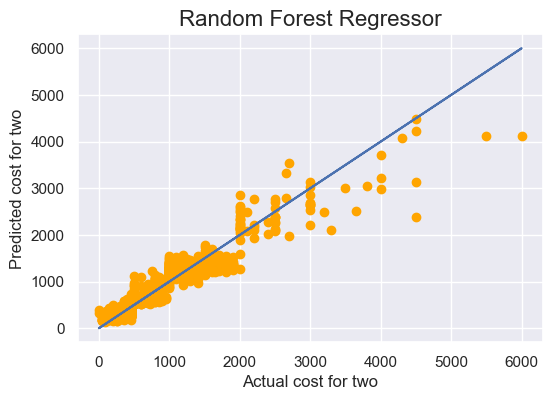

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(x=y_test,y=pred_test,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual cost for two',fontsize= 12)
plt.ylabel('Predicted cost for two',fontsize= 12)
plt.title('Random Forest Regressor',fontsize= 16)
plt.show()

# Saving the MOdel

In [71]:
import pickle
filename = 'averagecostfortwo.pkl'
pickle.dump(rf,open(filename, 'wb'))

# Predicting the Model

In [72]:
dfpred=pd.DataFrame({'Expected':y_test,'Predicted':pred_test})
dfpred.sample(40)

,Expected,Predicted
5473,150,325.626568
1853,1200,1447.020526
5938,300,302.388191
7530,3000,2693.806818
2494,1500,1273.505301
788,1600,1607.901042
8794,650,598.869320
2860,100,265.983260
9258,300,393.113508
7381,200,276.347222
